In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as pl
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [ ]:
path = "/content/drive/MyDrive/bank-additional-full.csv"
df = pd.read_csv(path, sep = ';')

In [ ]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
idx = np.random.rand(len(df)) < 0.8
train = df[idx]
test = df[~idx]


In [ ]:
train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41179,64,retired,divorced,professional.course,no,yes,no,cellular,nov,fri,...,3,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41180,36,admin.,married,university.degree,no,no,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41181,37,admin.,married,university.degree,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41182,29,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,...,1,9,1,success,-1.1,94.767,-50.8,1.028,4963.6,no


In [ ]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


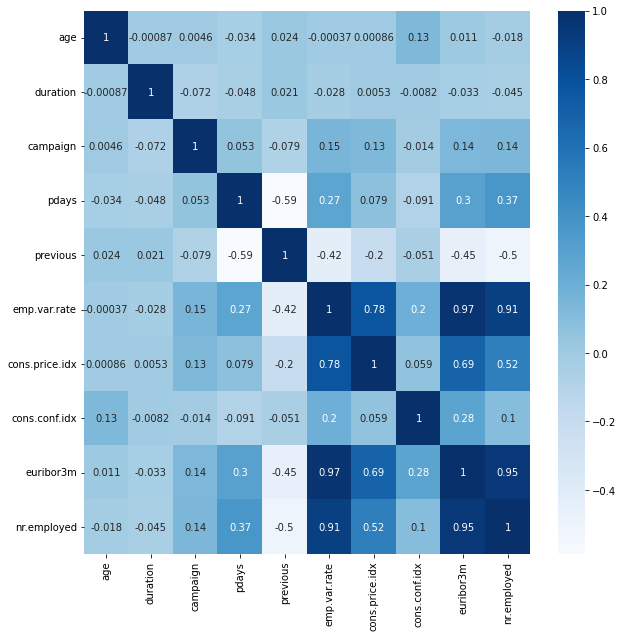

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Blues')

 number of employees feature is very much related to euribor 3 month rate and employment variation rate, and even the consumer price index. All thesee features are dependent on each others so the don't have to be checked individually

In [ ]:
Data_categorical = df.select_dtypes(include='object')
Data_categorical

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent,yes
41184,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,no
41185,retired,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent,no
41186,technician,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,yes


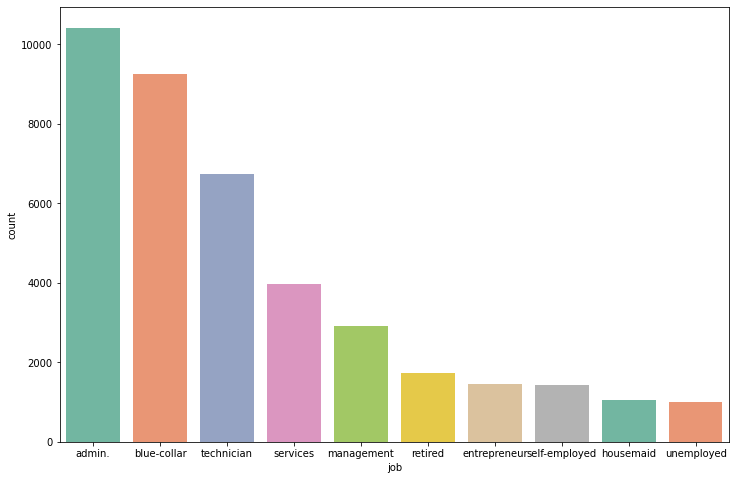

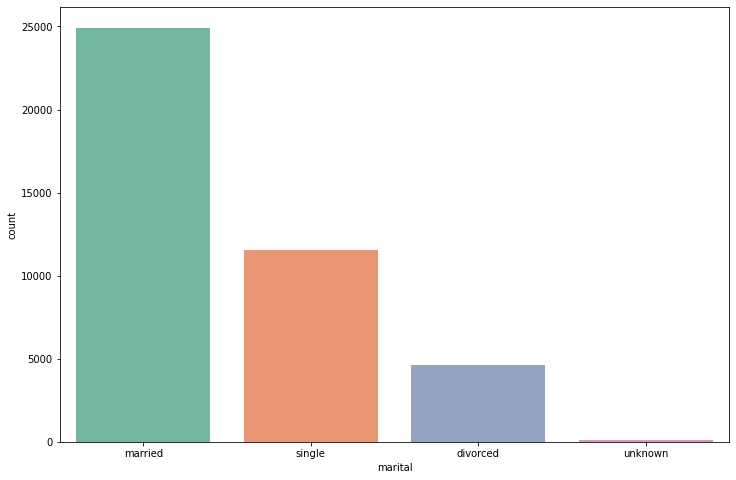

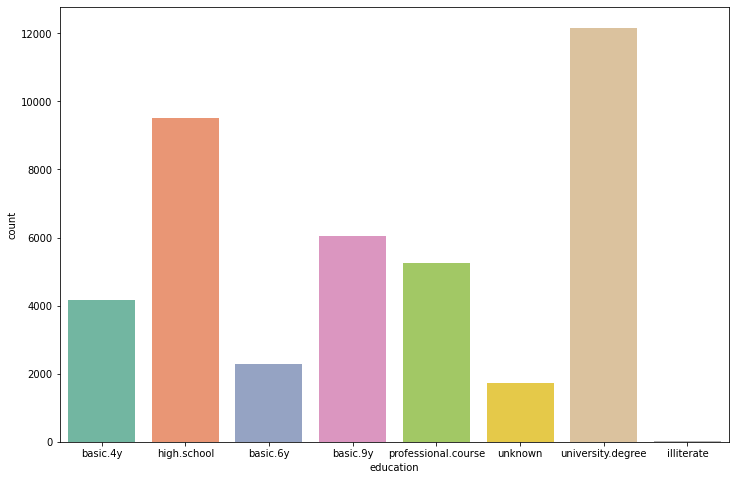

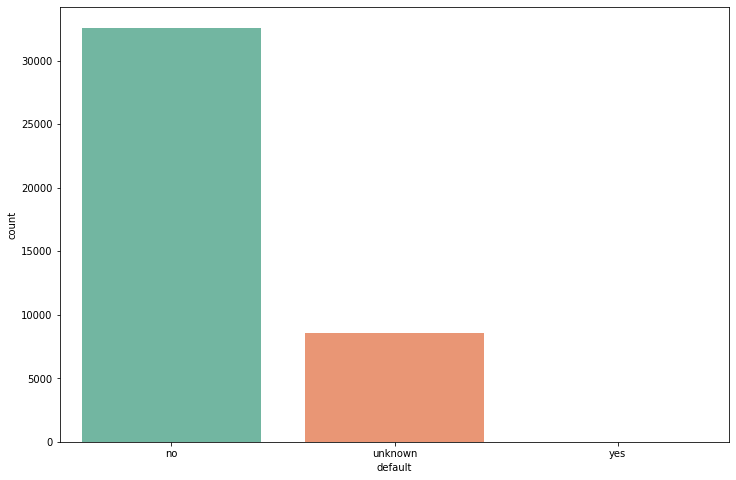

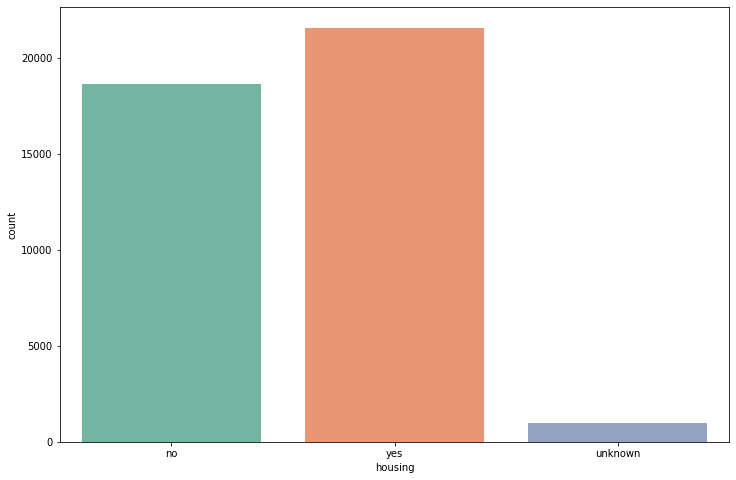

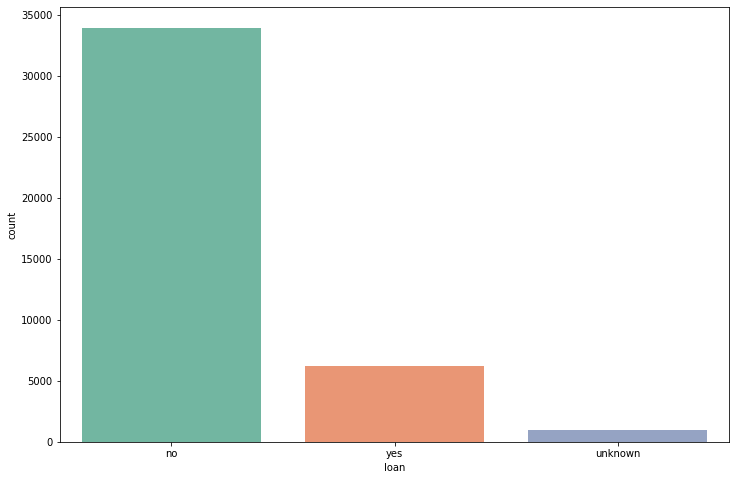

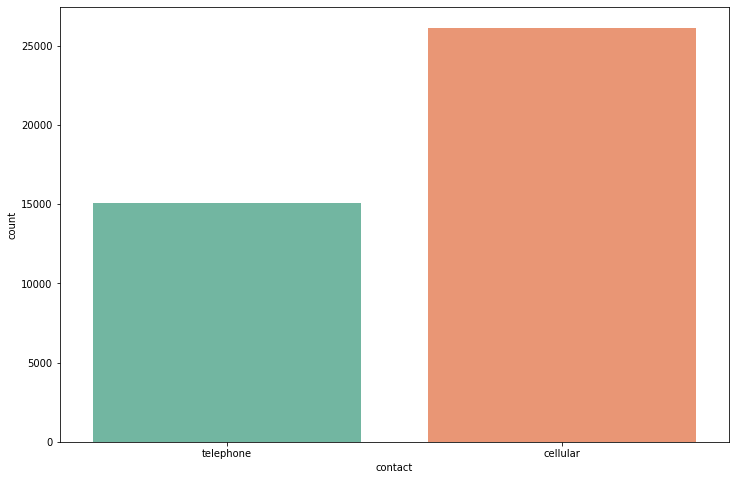

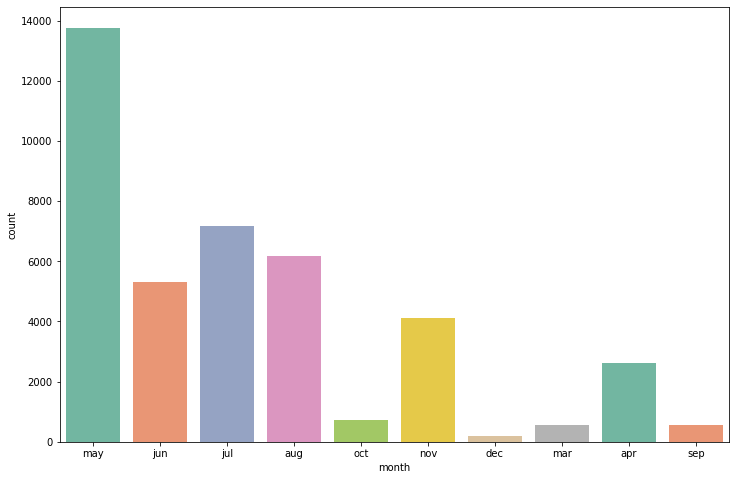

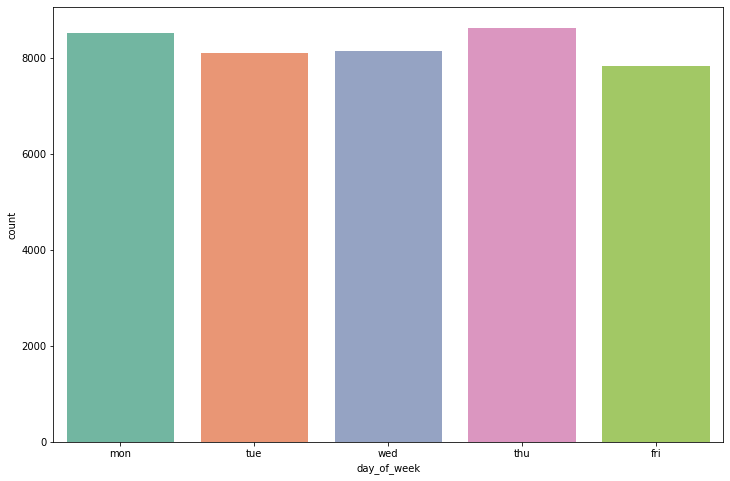

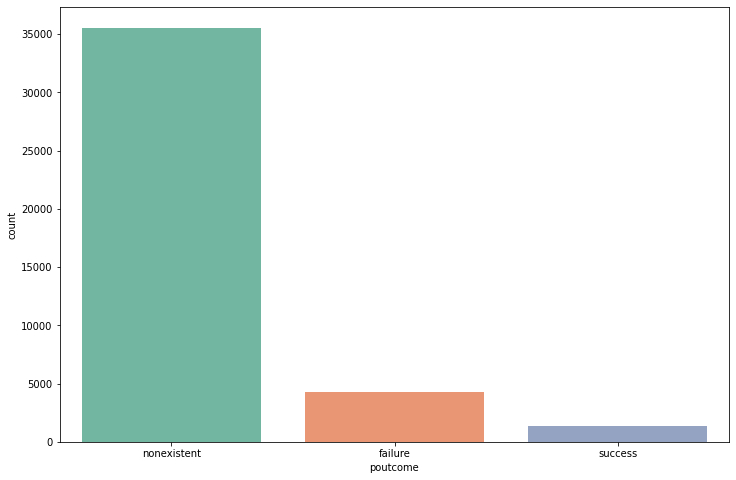

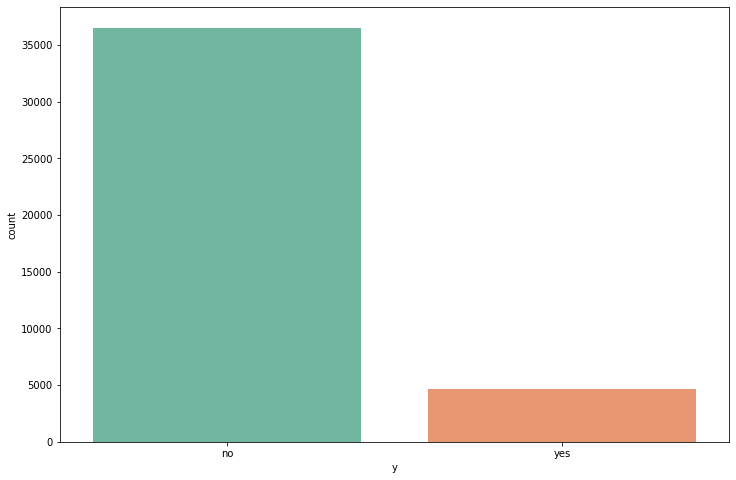

In [ ]:
for column in Data_categorical.columns[0:]:
    if (len(Data_categorical[column].value_counts())>10):
        plt.figure(figsize=(12, 8))
        sns.countplot(x=column, data = Data_categorical, order = Data_categorical[column].value_counts().iloc[:10].index, palette="Set2");
    else:
        plt.figure(figsize=(12, 8))
        sns.countplot(x=column, data = Data_categorical, palette="Set2");

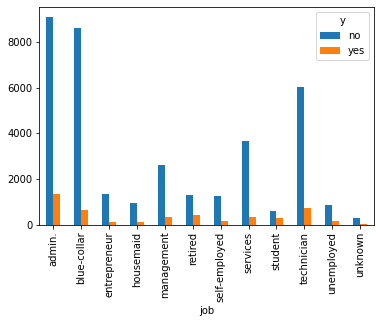

In [ ]:
CrosstabResult_job=pd.crosstab(index=df['job'],columns=df['y'])
df_job_target = CrosstabResult_job
CrosstabResult_job.plot.bar()

In [ ]:
df_A = 100*df_job_target['yes'] / (df_job_target['yes'] + df_job_target['no'] )
df_A

job
admin.           12.972558
blue-collar       6.894316
entrepreneur      8.516484
housemaid        10.000000
management       11.217510
retired          25.232558
self-employed    10.485574
services          8.138070
student          31.428571
technician       10.826042
unemployed       14.201183
unknown          11.212121
dtype: float64

students and retired people have more probability for an yes, but since their samples is very much less, conclusion would be admin reated work people get it subscribed

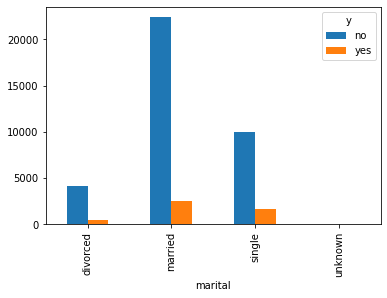

In [ ]:
CrosstabResult_marital=pd.crosstab(index=df['marital'],columns=df['y'])
df_marital_target = CrosstabResult_marital
CrosstabResult_marital.plot.bar()

In [ ]:
df_B = 100*df_marital_target['yes'] / (df_marital_target['yes'] + df_marital_target['no'] )
df_B

marital
divorced    10.320902
married     10.157253
single      14.004149
unknown     15.000000
dtype: float64

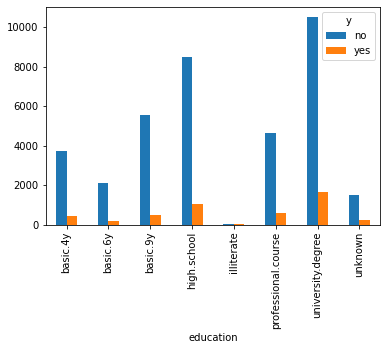

In [ ]:
CrosstabResult_edu=pd.crosstab(index=df['education'],columns=df['y'])
df_edu_target = CrosstabResult_edu
CrosstabResult_edu.plot.bar()

In [ ]:
df_C = 100*df_edu_target['yes'] / (df_edu_target['yes'] + df_edu_target['no'] )
df_C

education
basic.4y               10.249042
basic.6y                8.202443
basic.9y                7.824648
high.school            10.835523
illiterate             22.222222
professional.course    11.348465
university.degree      13.724523
unknown                14.500289
dtype: float64

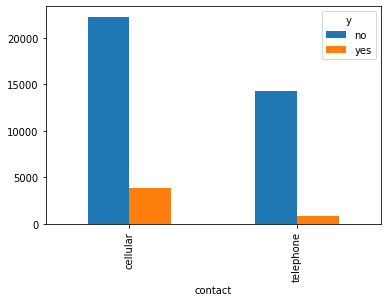

In [ ]:
CrosstabResult_con=pd.crosstab(index=df['contact'],columns=df['y'])
df_con_target = CrosstabResult_con
CrosstabResult_con.plot.bar()

In [ ]:
df_D = 100*df_con_target['yes'] / (df_con_target['yes'] + df_con_target['no'] )
df_D

contact
cellular     14.737607
telephone     5.231321
dtype: float64

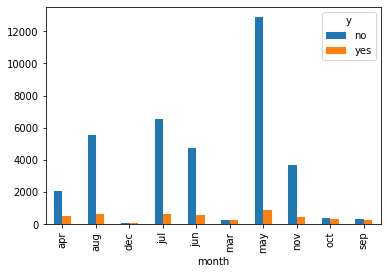

In [ ]:
CrosstabResult_mon=pd.crosstab(index=df['month'],columns=df['y'])
df_mon_target = CrosstabResult_mon
CrosstabResult_mon.plot.bar()

In [ ]:
df_D = 100*df_mon_target['yes'] / (df_mon_target['yes'] + df_mon_target['no'] )
df_D

month
apr    20.478723
aug    10.602137
dec    48.901099
jul     9.046557
jun    10.511470
mar    50.549451
may     6.434745
nov    10.143867
oct    43.871866
sep    44.912281
dtype: float64

In [ ]:
df2 = df[['age','y']]

   age   y
0   56  no
1   57  no
2   37  no
3   40  no
4   56  no


/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


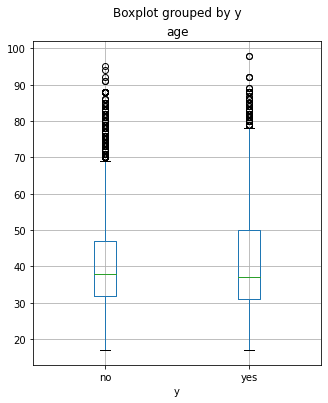

In [ ]:
age_target=pd.DataFrame(data=df2,columns=list(df2.columns))
print(age_target.head())
age_target.boxplot(column='age', by='y', figsize=(5,6))

In [ ]:
df3 = df[['euribor3m','y']]

   euribor3m   y
0      4.857  no
1      4.857  no
2      4.857  no
3      4.857  no
4      4.857  no


/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


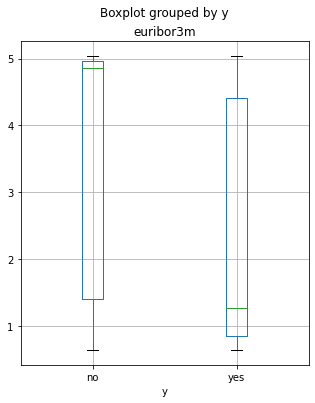

In [ ]:
eu_target=pd.DataFrame(data=df3,columns=list(df3.columns))
print(eu_target.head())
eu_target.boxplot(column='euribor3m', by='y', figsize=(5,6))

In [ ]:
df4 = df[['cons.conf.idx','y']]

   cons.conf.idx   y
0          -36.4  no
1          -36.4  no
2          -36.4  no
3          -36.4  no
4          -36.4  no


/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


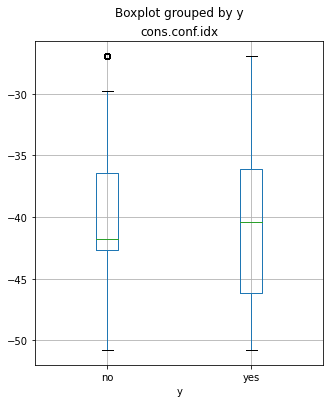

In [ ]:
cci_target=pd.DataFrame(data=df4,columns=list(df4.columns))
print(cci_target.head())
cci_target.boxplot(column='cons.conf.idx', by='y', figsize=(5,6))

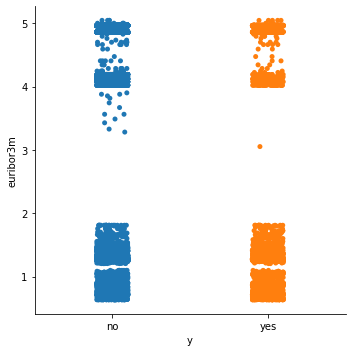

In [ ]:
sns.catplot(data=df3, x="y", y="euribor3m")

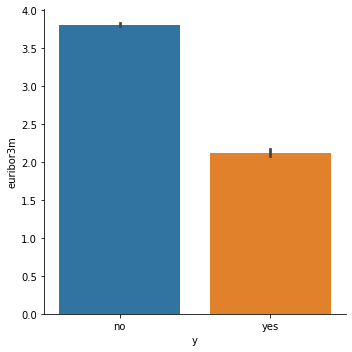

In [ ]:
sns.catplot(data=df3, x="y", y="euribor3m", kind="bar")

In [ ]:
from sklearn import preprocessing
cluster = train.copy()
scaler = preprocessing.MinMaxScaler()
cluster[['age','cons.price.idx']] = scaler.fit_transform(cluster[['age','cons.price.idx']])

In [ ]:
from kmodes.kprototypes import KPrototypes
kproto = KPrototypes(n_clusters=2, init='Cao')
clusters = kproto.fit_predict(cluster, categorical=[0, 1])
#join data with labels 
labels = pd.DataFrame(clusters)
labeledCustomers = pd.concat((cluster,labels),axis=1)
labeledCustomers = labeledCustomers.rename({0:'labels'},axis=1)

In [ ]:
ndf = df.drop("education", axis='columns')


KeyError: ignored

In [ ]:
X = df.iloc[:, [1, 2, 3]].values
y = df.iloc[:, -1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,-3] = le.fit_transform(X[:,-3])
y= le.fit_transform(y)

In [ ]:
X

array([[3, 1, 'basic.4y'],
       [7, 1, 'high.school'],
       [7, 1, 'high.school'],
       ...,
       [5, 1, 'university.degree'],
       [9, 1, 'professional.course'],
       [5, 1, 'professional.course']], dtype=object)

In [ ]:
from sklearn.preprocessing import StandardScaler


In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

ValueError: ignored

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

ValueError: ignored